In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
df = pd.read_csv("/content/drive/MyDrive/MyDataSets/Cleaned_Diab.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,207,33.6,0.627,50,1
1,1,85,66,29,130,26.6,0.351,31,0
2,8,183,64,33,207,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# Seperating Input and Target Variables

X = df.drop(columns = 'Outcome', axis = 1)
y = df['Outcome']

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [31]:
# Splitting data into training and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [32]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [33]:
# Collecting best model and its score

best_model = None
best_accuracy = 0.0

# Loop through each model from the above models dictionary
for model_name, model in models.items():

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Check if this model has the highest accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Model: {best_model}")
print(f"Highest Accuracy: {best_accuracy:.4f}")


Logistic Regression Evaluation:
Accuracy: 0.7857
Precision: 0.7115
Recall: 0.6727
F1 Score: 0.6916


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Evaluation:
Accuracy: 0.8831
Precision: 0.8364
Recall: 0.8364
F1 Score: 0.8364

SVM Evaluation:
Accuracy: 0.8571
Precision: 0.7895
Recall: 0.8182
F1 Score: 0.8036

Decision Tree Evaluation:
Accuracy: 0.8052
Precision: 0.6923
Recall: 0.8182
F1 Score: 0.7500

KNN Evaluation:
Accuracy: 0.8377
Precision: 0.7778
Recall: 0.7636
F1 Score: 0.7706

Naive Bayes Evaluation:
Accuracy: 0.7792
Precision: 0.6780
Recall: 0.7273
F1 Score: 0.7018

Best Model: RandomForestClassifier()
Highest Accuracy: 0.8831


In [34]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters for Logistic Regression:", grid_search.best_params_)

Best Parameters for Logistic Regression: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [41]:
best_rf = RandomForestClassifier(max_depth = 20, min_samples_split = 5, n_estimators = 200)
# Train the model
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Accuracy scopre
print(accuracy_score(y_test, y_pred))

0.8831168831168831


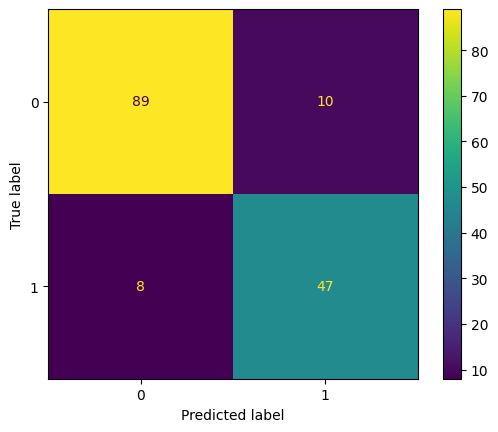

In [42]:
# Confusion matrix Display
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### Making a Predictive Syatem

In [37]:
#input_data = (1, 85, 66, 29, 130, 26.6, 0.351, 31) #0
input_data = (8, 183,	64,	33,	207,	23.3,	0.672,	32) #1


# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = best_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print("The Person is not Diabetic")
else:
  print("The Person is Diabetic")

[1]
The Person is Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
'''
import pickle

filename = 'diabetes_model.sav'
pickle.dump(best_model, open(filename, 'wb'))
'''

"\nimport pickle\n\nfilename = 'diabetes_model.sav'\npickle.dump(best_model, open(filename, 'wb'))\n"

In [39]:
# Loading the saved model
#loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [40]:
'''
input_data = (1, 85, 66, 29, 130, 26.6, 0.351, 31) #0
#input_data = (8, 183,	64,	33,	207,	23.3,	0.672,	32) #1

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print("The Person is not Diabetic")
else:
  print("The Person is Diabetic")

'''

'\ninput_data = (1, 85, 66, 29, 130, 26.6, 0.351, 31) #0\n#input_data = (8, 183,\t64,\t33,\t207,\t23.3,\t0.672,\t32) #1\n\n# Changing the input_data to numpy array\ninput_data_as_numpy_array = np.asarray(input_data)\n\n# Reshape the array as we are predicting for one instance\ninput_data_reshaped = input_data_as_numpy_array.reshape(1,-1)\n\nprediction = loaded_model.predict(input_data_reshaped)\nprint(prediction)\n\nif (prediction[0] == 0):\n  print("The Person is not Diabetic")\nelse:\n  print("The Person is Diabetic")\n\n'